In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [21]:
!ls '/content/gdrive/My Drive/images for 490/cars_train'

1    11   120  131  142  153  164  175	186  2	 30  41  52  63  74  85  96
10   110  121  132  143  154  165  176	187  20  31  42  53  64  75  86  97
100  111  122  133  144  155  166  177	188  21  32  43  54  65  76  87  98
101  112  123  134  145  156  167  178	189  22  33  44  55  66  77  88  99
102  113  124  135  146  157  168  179	19   23  34  45  56  67  78  89
103  114  125  136  147  158  169  18	190  24  35  46  57  68  79  9
104  115  126  137  148  159  17   180	191  25  36  47  58  69  8   90
105  116  127  138  149  16   170  181	192  26  37  48  59  7	 80  91
106  117  128  139  15	 160  171  182	193  27  38  49  6   70  81  92
107  118  129  14   150  161  172  183	194  28  39  5	 60  71  82  93
108  119  13   140  151  162  173  184	195  29  4   50  61  72  83  94
109  12   130  141  152  163  174  185	196  3	 40  51  62  73  84  95


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
import keras
import os, sys
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import numpy as np

# Define train data
columns = ['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class', 'fname']
train_images_dir = os.path.join('./', 'cars_train')
# train_labels_mat = scipy.io.loadmat('cars_train_annos.mat')
# train_labels_data = [[row.flat[0] for row in line] for line in train_labels_mat['annotations'][0]]
# df_train = pd.DataFrame(train_labels_data, columns=columns)
# print("\n================================\nTrain Data\n================================\n", df_train)
test_images_dir = os.path.join('./', 'cars_test')

In [4]:
# Try out CNN
batch_size = 64
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Rescale the images
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Run images through the image generators
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_images_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           shuffle=True,
                                                           class_mode='categorical')

Found 2000 images belonging to 196 classes.


In [5]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                             directory=test_images_dir,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             class_mode='categorical')

Found 2000 images belonging to 196 classes.


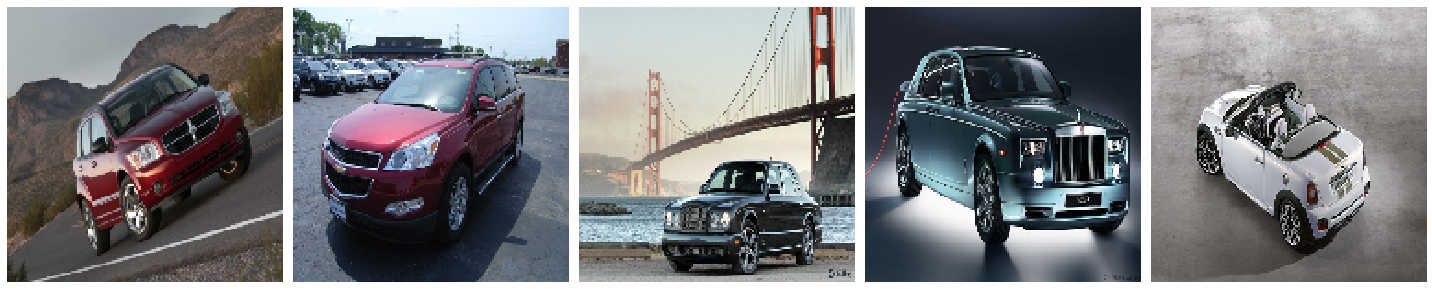

In [6]:
# Visualize training images
sample_training_images, _ = next(train_data_gen)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])

#define model

In [7]:

# It's sequential with 3 Convolutional layers and two dense layers.
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(196, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:

# Complile model 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# View all of the layers of the network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [18]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=2, #8044 // batch_size,
    epochs=2,
    validation_data=train_data_gen,
    validation_steps=2 #100 // batch_size
    #validation_data=test_data_gen
    #validation_steps=2, #100 // batch_size
)

Epoch 1/2
2/2 [==============================] - 7s 4s/step - loss: 5.2721 - acc: 0.0000e+00 - val_loss: 5.2342 - val_acc: 0.0156
Epoch 2/2
2/2 [==============================] - 21s 11s/step - loss: 5.2791 - acc: 0.0000e+00 - val_loss: 5.2390 - val_acc: 0.0156


In [0]:
for directory in range(1, 197):
   path = './cars_train/' + str(directory)
   os.mkdir(path, 755)
   path2 = './cars_test/' + str(directory)
   os.mkdir(path2, 755)


for name in class_filenames:
    if count < 2000:
        old_path = "./cars_train/" + name
        new_path = "./cars_test/" + str(class_names[count]) + "/" + name
    else:
        old_path = "./cars_train/" + name
        new_path = "./cars_train/" + str(class_names[count]) + "/" + name
    
    os.rename(old_path, new_path)
    count += 1

#Transfer learning model

##Get training data in correct shape for transfer model

In [7]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [8]:
IMG_HEIGHT_TRANSFER = 224
IMG_WIDTH_TRANSFER = 224

In [9]:
train_data_gen_transfer = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_images_dir,
                                                           target_size=(IMG_HEIGHT_TRANSFER, IMG_WIDTH_TRANSFER),
                                                           shuffle=True,
                                                           class_mode='categorical')

Found 2000 images belonging to 196 classes.


In [10]:
test_data_gen_transfer = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                             directory=test_images_dir,
                                                             target_size=(IMG_HEIGHT_TRANSFER, IMG_WIDTH_TRANSFER),
                                                             class_mode='categorical')

Found 2000 images belonging to 196 classes.


##Download the Headless Model (without the top classification layer)

In [11]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4" 

In [12]:
import tensorflow_hub as hub

In [13]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))

In [14]:
feature_extractor_layer.trainable = False

##Attach a classification head to sort images into 196 classes

In [15]:
from tensorflow.keras import layers

In [16]:
transfer_model = tf.keras.Sequential([
  feature_extractor_layer,
  layers.Dense(train_data_gen_transfer.num_classes, activation='softmax')
])

transfer_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 196)               251076    
Total params: 2,509,060
Trainable params: 251,076
Non-trainable params: 2,257,984
_________________________________________________________________


##Train the model (only the weights for the classification head)

In [17]:
transfer_model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [19]:
transfer_history = transfer_model.fit_generator(train_data_gen_transfer, epochs=15,
                              steps_per_epoch= 2000 // batch_size,
                              validation_data=test_data_gen_transfer,
                              validation_steps=2000 // batch_size
                              )
#doesn't work with true validation set because the validation set doesn't have images for every class. once the validation set is big enough it should hopefully work

Epoch 1/15
31/31 [==============================] - 18s 575ms/step - loss: 2.3341 - accuracy: 0.6606 - val_loss: 3.8189 - val_accuracy: 0.1618
Epoch 2/15
31/31 [==============================] - 18s 574ms/step - loss: 1.8863 - accuracy: 0.7624 - val_loss: 3.7207 - val_accuracy: 0.1830
Epoch 3/15
31/31 [==============================] - 18s 573ms/step - loss: 1.5313 - accuracy: 0.8590 - val_loss: 3.6166 - val_accuracy: 0.1900
Epoch 4/15
31/31 [==============================] - 19s 607ms/step - loss: 1.2780 - accuracy: 0.9060 - val_loss: 3.5700 - val_accuracy: 0.1951
Epoch 5/15
31/31 [==============================] - 18s 572ms/step - loss: 1.0822 - accuracy: 0.9298 - val_loss: 3.5342 - val_accuracy: 0.1941
Epoch 6/15
31/31 [==============================] - 18s 580ms/step - loss: 0.8829 - accuracy: 0.9540 - val_loss: 3.4971 - val_accuracy: 0.2056
Epoch 7/15
31/31 [==============================] - 18s 572ms/step - loss: 0.7572 - accuracy: 0.9669 - val_loss: 3.4878 - val_accuracy: 0.2061

#Second transfer learning model